## Image compression using K-means from Scratch in Python

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.io import loadmat
from KMeans import *

### Andrew Ng Coursera

In [2]:
Image = loadmat("bird_small.mat")
A = Image["A"]

In [3]:
#Checking the shape
A.shape

(128, 128, 3)

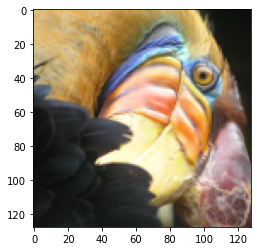

In [4]:
# Display image
img = plt.imshow(A)

#### Preprocessing image

In [5]:
X = (A/255).reshape(A.shape[0]*A.shape[1],3)

In [6]:
 def CompressedImage(X,K,num_iter):
        kmeans = KMeans(16)
        initial_centriod = kmeans.kMeansInitCentroids(X)
        compressed_Centriod,conpressed_idx = kmeans.runKmeans(X,initial_centriod,10)
        X_Compressed = X.copy()
        for i in range(1,K+1):
            X_Compressed[(conpressed_idx == i).ravel(),:] = compressed_Centriod[i-1]
        return X_Compressed

In [7]:
X_Compressed = CompressedImage(X,16,10)
X_Compressed = X_Compressed.reshape(A.shape[0],A.shape[1],3)
X = X.reshape(A.shape[0],A.shape[1],3)

### Visualize Image

In [8]:
  def plot_image(Orginal,Compressed): 
    fig,ax = plt.subplots(1,2)
    Img1 = ax[0].imshow(Orginal)
    Img2 = ax[1] .imshow(Compressed)
    for i in range(2):
        title = ["Orginal","Compressed"]
        ax[i].set_title(title[i])

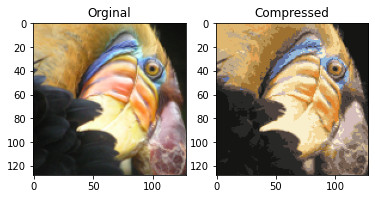

In [9]:
plot_image(X,X_Compressed)

### Compress own image

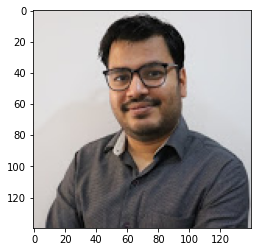

In [10]:
img = mpimg.imread('2021-01-09.jpg')
imgplot = plt.imshow(img)
plt.show()

In [11]:
A = img

In [12]:
K = 16
num_iter = 10
X = (A/255).reshape(A.shape[0]*A.shape[1],3)

In [13]:
X_Compressed = CompressedImage(X,16,10)
X_Compressed = X_Compressed.reshape(A.shape[0],A.shape[1],3)
X = X.reshape(A.shape[0],A.shape[1],3)

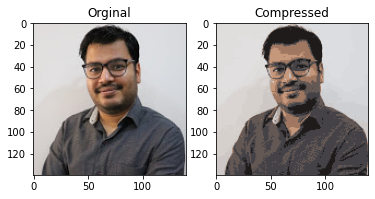

In [14]:
plot_image(X,X_Compressed)